<h2>SVM (Support Vector Machine) - SVM primal problem from scratch</h2>

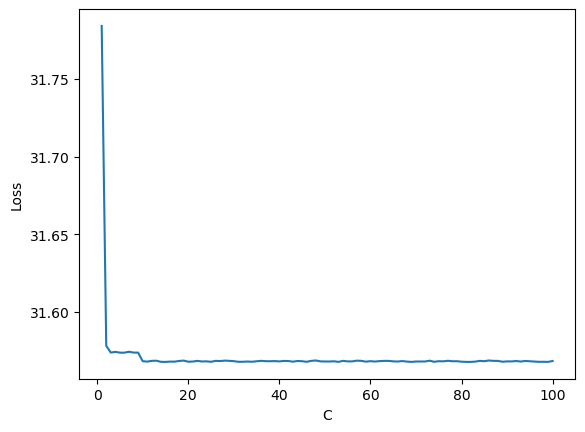

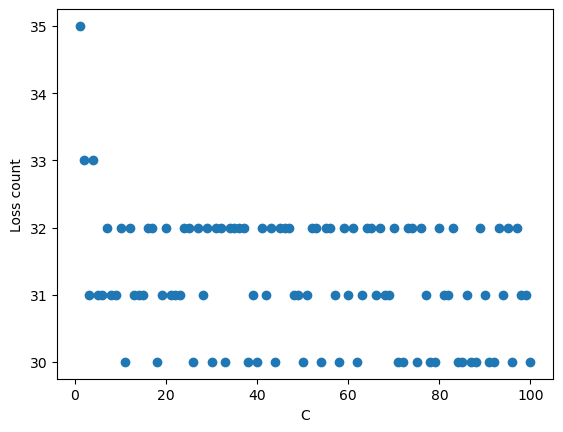

In [4]:
# laod data
import numpy as np
from math import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = np.loadtxt('svmData.csv', delimiter = ',')

X = np.delete(data, 2, axis = 1) # X[i][j]
y = np.delete(data, [0, 1], axis = 1) # y[i][0] - classes -1 and +1

# standardization
sr_vr = [] # mean value vector for all features
for j in range(0, 2):
    suma = 0
    std_clan = 0
    std2 = 0
    for i in range(0, len(X)):
        suma += X[i][j]
    sr_vr.append(suma / len(X)) # mean values
    
    for k in range(0, len(X)):
        std_clan += (X[k][j] - sr_vr[j - 1]) ** 2 # calculate sum for std dev
    std2 = 1 / len(X) * std_clan # std_dev ^ 2
    
    for q in range(0, len(X)):
        X[q][j] = (X[q][j] - sr_vr[j - 1]) / sqrt(std2)
        
# calculate the loss
const_C = np.linspace(1, 100, 100)
gubitak = [0] * len(const_C)
br = [0] * len(const_C)

for i in range(0, len(const_C)):
    clf = SVC(C = const_C[i], kernel = 'linear')
    clf.fit(X, y.ravel())
    
    w = clf.coef_
    b = clf.intercept_
    supp_vec = clf.support_vectors_
    
    for j in range(0, len(X)):
        gama_kapa = (np.dot(w, X[j]) + b) * y[j]
        
        if(gama_kapa < 1):
            br[i] = br[i] + 1
            gubitak[i] = gubitak[i] + 1 - gama_kapa
    
plt.plot(const_C, gubitak)
plt.xlabel('C')
plt.ylabel('Loss')
plt.show()

plt.scatter(const_C, br)
plt.xlabel('C')
plt.ylabel('Loss count')
plt.show()

In [5]:
C_opt = const_C[br.index(min(br))] # C_opt = 11

clf = SVC(C = C_opt, kernel = 'linear')
clf.fit(X, y.ravel())

print('w =', clf.coef_)
print('b =', clf.intercept_)
print('Indices of support vectors =', clf.support_)
print('Support vectors =', clf.support_vectors_)
print('Number of support vectors for each class =', clf.n_support_)
print('Coefficients of the support vector in the decision function =', np.abs(clf.dual_coef_))

w = clf.coef_
b = clf.intercept_
indeksi = clf.support_
supp_vec = clf.support_vectors_

w = [[-0.3106674   2.00323472]]
b = [-0.15015632]
Indices of support vectors = [ 3  8 23 32 33 34 35 43 44 56 57 62 63 72 77 83 93  5 14 16 17 20 24 27
 28 30 39 45 48 85 89 90 99]
Support vectors = [[ 0.63414756  0.54207438]
 [-1.70062067  0.34840945]
 [-1.25567272 -0.61902356]
 [ 0.86066106  0.20657672]
 [ 0.523742    0.10041182]
 [ 0.6779949   0.20670196]
 [ 0.42160373 -0.03328693]
 [-0.0565529  -0.22435655]
 [ 0.39917417 -0.36238671]
 [-1.33041598 -0.48025991]
 [-1.74067507  0.61064534]
 [ 1.12083366 -0.14810494]
 [ 0.74464868  0.34098002]
 [ 0.41478917 -0.10705936]
 [ 0.4866411   0.11881683]
 [ 0.78536817 -0.03886399]
 [ 0.99076413 -0.12081346]
 [ 1.51302419  0.04136025]
 [ 0.08649298  0.31665382]
 [-0.37390013 -0.55963244]
 [-1.19529902 -0.37174601]
 [ 1.40864242  0.51801239]
 [ 1.39960547  0.47030668]
 [-0.28647956  0.52983174]
 [-0.92585449  0.02031924]
 [-1.02730193  0.27047851]
 [-0.71621046 -0.55936963]
 [ 1.50404228 -1.01694032]
 [ 1.20912205  0.68344341]
 [-0.48531142  0.3

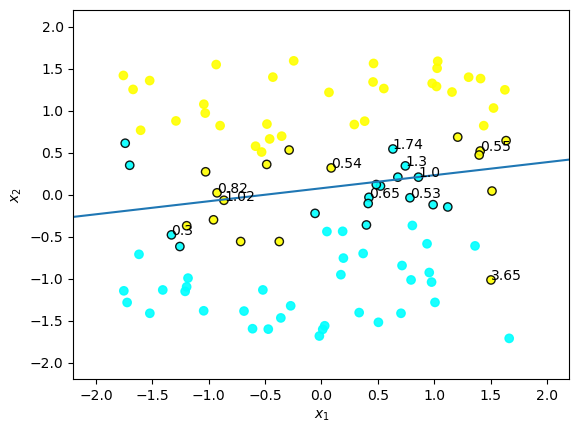

In [6]:
boja_kruga = []
colors = []

for i in range(0, len(X)):
    for j in range(0, len(supp_vec)):
        if(np.array_equal(X[i], supp_vec[j])):
            if(y[i][0] == 1):
                colors.append('yellow')
                boja_kruga.append('black')
                break
            if(y[i][0] == -1):
                colors.append('cyan')
                boja_kruga.append('black')
                break
                
    if(len(boja_kruga) < i + 1):    
        if(y[i][0] == 1):
            colors.append('yellow')
            boja_kruga.append('yellow')

        if(y[i][0] == -1):
            boja_kruga.append('cyan')
            colors.append('cyan')
        
x_min = -2.2
x_max = 2.2
y_min = -2.2
y_max = 2.2

xx = np.linspace(x_min, x_max) # len(xx) = 50

gubici = []
for i in range(0, len(supp_vec), 3):
    gama = (np.dot(w, supp_vec[i]) + b) * y[indeksi[i]][0]
    gubici.append(1 - gama)

plt.plot(xx, -b[0] / w[0][1] - (w[0][0] / w[0][1]) * xx)
plt.scatter(X[:, 0], X[:, 1], c = y.ravel(), alpha = 0.9, cmap = matplotlib.colors.ListedColormap(colors), edgecolors = boja_kruga)

brr = 0
for i in range(0, len(supp_vec), 3):
    plt.text(supp_vec[i][0], supp_vec[i][1], round(gubici[brr][0], 2))
    brr = brr + 1

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()